In [1]:
%matplotlib inline
#%pylab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
Z = 18
A = 39.948   # g / mol
I = 188.0*(10**(-6)) # eV
K = 0.307 # MeV * cm^2 / mol
Mmu = 105.658 # MeV for muon
Me  = 0.51 # MeV for electron
rho = 1.396 # LAr density [g/cm3]

In [3]:
def beta(gamma):
    return np.sqrt(1-(1./(gamma**2)))
    
def gamma(KE,mass):
    return (KE/mass)+1.

In [4]:
# Density correction

# from PDG elos muons table

C  = -5.2146
X0 = 0.2
X1 = 3.0
a  = 0.19559
m  = 3.0
N    = 2 * np.log(10)

def density(bg):
    x = np.log10(bg)
    if (x < X0):
        return 0.
    if (x > X1):
        return N * x + C
    addition = a*((X1-x)**m)
    return N * x + C + addition

In [5]:
def Wmax (KE,mass):
    g = gamma(KE,mass)
    b = beta(g)
    num = 2*Me*((b*g)**2)
    den = 1 + 2*g*Me/mass + (Me/mass)**2
    return num/den

In [6]:
# KE in MeV
# x in cm
# mass in MeV
def dpdx(KE,x,mass):
    g = gamma(KE,mass)
    b = beta(g)
    epsilon = (K/2.)*(Z/A)*(x*rho/(b*b))
    A0 = (2*Me*(b*g)**2)/I
    A1 = epsilon/I
    return (1./x) * epsilon * (np.log(A0) + np.log(A1) + 0.2 - (b*b) - density(b*g))

In [7]:
# in MeV/cm
def dedx(KE,mass):
    g = gamma(KE,mass)
    b = beta(g)
    f = K * (Z/A)*(1/b)**2
    wmax = Wmax(KE,mass)
    a0 = 0.5*np.log( 2*Me*(b*g)**2 * wmax / (I*I) )
    dens = density(b*g)
    return f * rho * (a0 - b*b - dens/2.)

In [8]:
KEvals = np.linspace(10,100000,10000)
dpvals04 = []
dpvals03 = []
dpvals05 = []
dpvals30 = []
dedxvals = []

dpsmall = []

x = 0.49 # cm

for KE in KEvals:
    dpvals04.append(dpdx(KE,0.4,Mmu))
    dpvals05.append(dpdx(KE,0.5,Mmu))
    dpvals03.append(dpdx(KE,0.3,Mmu))
    dpvals30.append(dpdx(KE,3.0,Mmu))
    dpsmall.append(dpdx(KE,0.03,Mmu))
    dedxvals.append(dedx(KE,Mmu))

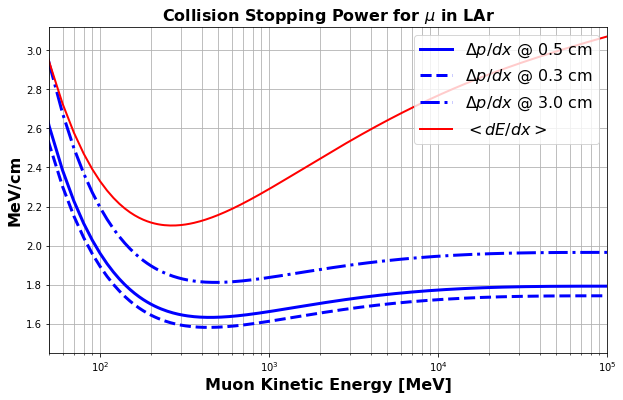

In [20]:
fig = plt.figure(figsize=(10,6))
plt.plot(KEvals,dpvals05,'-' ,color='b',lw=3,label='$\Delta p/dx$ @ 0.5 cm')
plt.plot(KEvals,dpvals03,'--',color='b',lw=3,label='$\Delta p/dx$ @ 0.3 cm')
plt.plot(KEvals,dpvals30,'-.',color='b',lw=3,label='$\Delta p/dx$ @ 3.0 cm')
plt.plot(KEvals,dedxvals,color='r',lw=2,label='$<dE/dx>$')
plt.grid(which='both')
plt.xlabel('Muon Kinetic Energy [MeV]',fontsize=16,fontweight='bold')
plt.ylabel('MeV/cm',fontsize=16,fontweight='bold')
#plt.ylim([1.75,1.85])
plt.ylim([1.45,3.12])
plt.legend(loc=1,fontsize=16)
plt.xlim([50,100000])
plt.xscale('log')
plt.title('Collision Stopping Power for $\mu$ in LAr',fontsize=16,fontweight='bold')
plt.show()